59.0
54.666666666666664
59.25


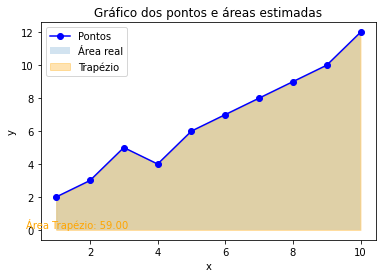

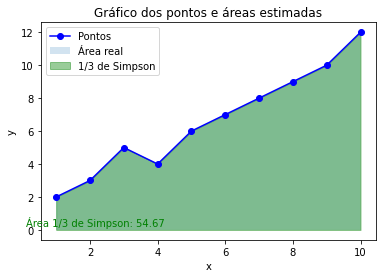

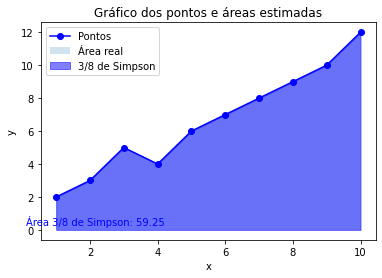

In [17]:
import csv
import matplotlib.pyplot as plt
import numpy as np

# Função para calcular a área usando o método do trapézio
def trapezoidal_rule(x, y):
    return np.trapz(y, x)

# Função para calcular a área usando o método de 1/3 de Simpson
def simpsons_one_third_rule(x, y):
    n = len(x) - 1
    h = (x[n] - x[0]) / n
    integral = y[0] + y[n]
    
    for i in range(1, n):
        if i % 2 == 0:
            integral += 2 * y[i]
        else:
            integral += 4 * y[i]
    
    integral *= h / 3
    return integral

# Função para calcular a área usando o método de 3/8 de Simpson
def simpsons_three_eighth_rule(x, y):
    n = len(x) - 1
    h = (x[n] - x[0]) / n
    integral = y[0] + y[n]
    
    for i in range(1, n):
        if i % 3 == 0:
            integral += 2 * y[i]
        else:
            integral += 3 * y[i]
    
    integral *= 3 * h / 8
    return integral

# Função para ler o arquivo CSV e tratar os valores nulos
def read_csv(filename):
    x_values = []
    y_values = []
    
    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)  # Lê o cabeçalho do CSV
        
        for row in csv_reader:
            x = float(row[0]) if row[0] else None
            y = float(row[1]) if row[1] else None
            
            x_values.append(x)
            y_values.append(y)
    
    # Substitui os valores nulos pela média da coluna
    x_mean = np.mean([x for x in x_values if x is not None])
    y_mean = np.mean([y for y in y_values if y is not None])
    
    x_values = [x if x is not None else x_mean for x in x_values]
    y_values = [y if y is not None else y_mean for y in y_values]
    
    return x_values, y_values

# Função para plotar o gráfico com os pontos, área real e áreas estimadas
def plot_graph_trap(x, y, trap_area):
    plt.plot(x, y, 'bo-', label='Pontos')
    plt.fill_between(x, y, alpha=0.2, label='Área real')
    
    if trap_area:
        plt.fill_between(x, y, alpha=0.3, color='orange', label='Trapézio')
        plt.text(0.1, 0.1, 'Área Trapézio: {:.2f}'.format(trap_area), color='orange')
    
    plt.title('Gráfico dos pontos e áreas estimadas')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
def plot_graph_13(x, y, simp13_area):
    plt.plot(x, y, 'bo-', label='Pontos')
    plt.fill_between(x, y, alpha=0.2, label='Área real')
    
    if simp13_area:
        plt.fill_between(x, y, alpha=0.4, color='green', label='1/3 de Simpson')
        plt.text(0.1, 0.2, 'Área 1/3 de Simpson: {:.2f}'.format(simp13_area), color='green')
        
    plt.title('Gráfico dos pontos e áreas estimadas')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
        
def plot_graph_38(x, y, simp38_area):
    plt.plot(x, y, 'bo-', label='Pontos')
    plt.fill_between(x, y, alpha=0.2, label='Área real')
    
    if simp38_area:
        plt.fill_between(x, y, alpha=0.5, color='blue', label='3/8 de Simpson')
        plt.text(0.1, 0.3, 'Área 3/8 de Simpson: {:.2f}'.format(simp38_area), color='blue')
    
    plt.title('Gráfico dos pontos e áreas estimadas')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()



# Ler os valores x e y do CSV
x, y = read_csv('pontos.csv')

# Calcular as áreas estimadas
area_real = simpsons_three_eighth_rule(x, y)
area_trap = trapezoidal_rule(x, y)
area_simp13 = simpsons_one_third_rule(x, y)
area_simp38 = simpsons_three_eighth_rule(x, y)

print(area_trap)
print(area_simp13)
print(area_simp38)

# Plotar o gráfico com os pontos, área real e áreas estimadas
plot_graph_trap(x, y, area_trap)
plot_graph_13(x, y, area_simp13)
plot_graph_38(x, y, area_simp38)


373.4013536033738
370.56626874808705
373.3333333333336


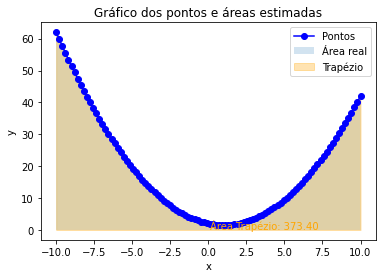

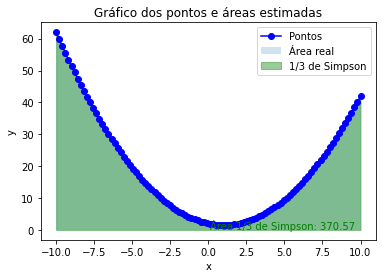

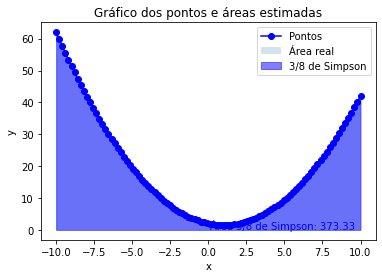

In [27]:
x, y = read_csv('parabola.csv')

# Calcular as áreas estimadas
area_real = simpsons_three_eighth_rule(x, y)
area_trap = trapezoidal_rule(x, y)
area_simp13 = simpsons_one_third_rule(x, y)
area_simp38 = simpsons_three_eighth_rule(x, y)

print(area_trap)
print(area_simp13)
print(area_simp38)

# Plotar o gráfico com os pontos, área real e áreas estimadas
plot_graph_trap(x, y, area_trap)
plot_graph_13(x, y, area_simp13)
plot_graph_38(x, y, area_simp38)


In [25]:
import csv
import numpy as np

# Parâmetros da parábola
a = 0.5
b = -1.0
c = 2.0

# Faixa de valores de x
x = np.linspace(-10, 10, 100)

# Calcular valores de y usando a equação da parábola
y = a * x**2 + b * x + c

# Escrever os valores de x e y no arquivo CSV
with open('parabola.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x', 'y'])  # Escreve o cabeçalho do CSV
    
    for i in range(len(x)):
        writer.writerow([x[i], y[i]])

print("Arquivo CSV 'parabola.csv' gerado com sucesso!")

Arquivo CSV 'parabola.csv' gerado com sucesso!
